## Convolution NeuralNetworks

Convolutional Neural Networks (CNNs) are a type of deep learning algorithm primarily used for analyzing visual data like images. They form the core of computer vision technology. They're structured to automatically and adaptively learn spatial hierarchies of features from the input data. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

The key components of a CNN include:

1. **Convolutional Layers:** These layers apply a set of learnable filters or kernels to the input data. The filters detect specific features in the input (like edges, textures, or patterns) by performing convolution operations. As the network progresses through layers, it can detect increasingly complex features.

2. **Pooling Layers:** Pooling layers downsample the feature maps generated by convolutional layers. Common pooling operations include max pooling, which selects the maximum value from a region, or average pooling, which computes the average. Pooling helps reduce the computational load, extract dominant features, and improve translation invariance.

3. **Fully Connected Layers:** These layers are typically found towards the end of the CNN and serve for classification or regression tasks. Also known as dense layers, take the output from previous layers and map it to the desired output space, like specific classes in the case of image classification.

### Steps of CNN

1. **Convolution:** The CNN begins with a series of convolutional layers. Each layer consists of multiple filters/kernels. These filters are small matrices that scan through the input image by performing a mathematical operation called convolution. The convolution operation involves element-wise multiplication of the filter elements with the input matrix, followed by summing up the results to produce a feature map. These feature maps represent various features detected in the input.

2. **Activation Function:** After the convolution operation, an activation function (commonly ReLU) is applied to introduce non-linearity to the network. ReLU helps in learning complex patterns and improves the network's ability to generalize.

3. **Pooling:** Following activation, pooling layers downsample the feature maps. Pooling reduces the spatial dimensions (width and height) of the input and extracts the most relevant information by summarizing a region. Max pooling, for example, selects the maximum value from a region, retaining the most activated features.

4. **Flattening:** After several convolutional and pooling layers, the data is flattened into a one-dimensional vector to be fed into a fully connected layer. This process maintains spatial hierarchies learned by previous layers.

5. **Fully Connected Layers:** These layers process the flattened data from the previous layers and perform high-level reasoning on the extracted features. They map the learned features to the desired output (e.g., classes in classification tasks) using techniques similar to traditional neural networks.

6. **Output Layer:** The final layer applies an activation function appropriate for the task. For classification tasks, softmax activation is often used to generate class probabilities, while for regression tasks, linear or sigmoid activations may be used.

7. **Training:** CNNs are trained using labeled data through a process called backpropagation, where the network adjusts its internal parameters (weights and biases) to minimize the difference between predicted and actual outputs. This is typically done using optimization algorithms like stochastic gradient descent (SGD) or its variants.

Through multiple iterations of forward and backward passes on the data (forward pass to make predictions and backward pass to update weights based on errors), the network learns to identify patterns, features, and relationships within the input data, gradually improving its ability to make accurate predictions or classifications.

### Preprocessing in CNN

Normalization: Normalizing the input data to ensure that all features have a similar scale. For images, this often involves scaling pixel values to a range like [0, 1] or [-1, 1]. Helps the network converge faster during training.

Resizing: Images in a dataset might have different sizes. Resizing them to a consistent size ensures uniformity and easier processing. Crucial to maintain consistency across the dataset and within batches fed into the CNN.

Data Augmentation: Augmentation techniques like rotation, flipping, zooming, cropping, or shifting can be applied to artificially increase the diversity of the training dataset. Helps prevent overfitting; improves model's generalization ability.

Other preprocessing techniques such as transfer learning, handling missing data, noise reduction and feature extraction that are not limeted to CNNs but can be needed

## Importing Libraries & Dataset

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [22]:
train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")

## EDA

In [23]:
train.shape

(60000, 785)

In [24]:
test.shape

(10000, 785)

In [25]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [33]:
train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [57]:
test.label.unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9])

In [35]:
train.isnull().any().sum() #using any() otherwise it gives a series with true/false values for each col

0

In [36]:
test.isnull().any().sum()

0

In [37]:
train['label'].value_counts() #classes are balanced

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

## Dataset split & Reshaping

In [54]:
X = np.array(train.iloc[:, 1:])
y = np.array(train.iloc[:, 0])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

X_test = np.array(test.iloc[:, 1:])
y_test = (np.array(test.iloc[:, 0]))

img_rows = 28
img_cols = 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)


## Visualization

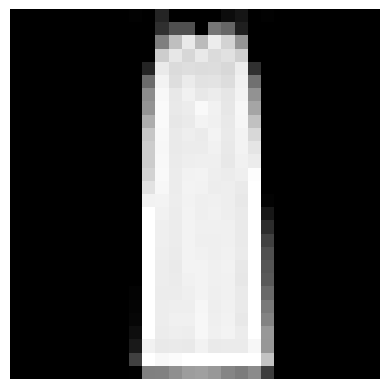

label: 3


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

idx = np.random.randint(len(X_train))
plt.imshow(np.squeeze(X_train[idx]), cmap='gray')
plt.axis('off')
plt.show()

print("label:", y_train[idx])

## Data Augmentation

Artificially creating variations or modifications of existing training data to expand the dataset; helps in generalization

In CNN, data augmentation can look like
1. Rotation: Rotating the image to a certain degree. Helps model recognize model from different angles.

2. Flipping: Mirror imaging horizontally or vertically

3. Zooming or Cropping: Enlarging or cropping parts of the picture can help the model focus on specific details.

4. Changing Colors or Brightness: Adjusting the brightness of a photo or slightly changing the color tones. Helps the model become robust to different lighting conditions.

5. Adding Noise: Introducing some random pixels or noise to the image can help the model fit in more realistic scenarios.

6. Shearing and translation: Tilting an image along one of its axes, while translation shifts the image horizontally or vertically

7. Elastic Distortion: mishaping the image using random displacement fields

Popularly tf's ImageDataGenerator() is used to perform these.

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, #rotate image by  10 degrees
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2 #set 20% of new generated data aside for validation set
)

augmented_images_training = datagen.flow(X_train, y_train, batch_size=32, shuffle=True, seed=42, subset='training')

In [66]:
def image_augmentation(img, nb):
    '''takes in img (raw image), nb (number of augmentations created), returns images (array with new images)'''
    images = []
    counter = 0
    for x_batch in datagen.flow(img, batch_size=1):
        images.append(x_batch)
        counter += 1
        if counter >= nb:
            break
    return images